In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
with open('timings.pkl', 'rb') as f:
    timings = pickle.load(f)

In [6]:
sizes = list(sorted(timings['scaler']['kaon'].keys()))
particles = list(timings['scaler'].keys())

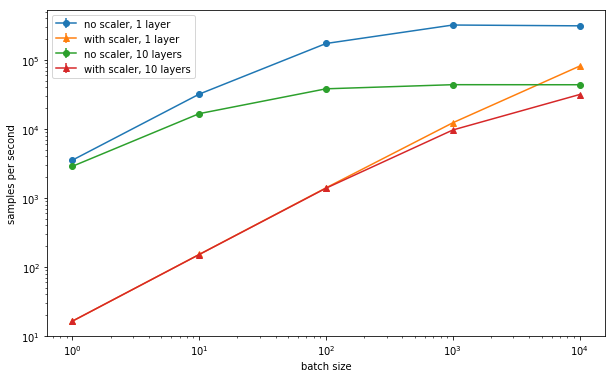

In [30]:
plt.figure(figsize=(10, 6))

t_raw        = np.empty(len(sizes), dtype=float)
t_raw_err    = np.empty(len(sizes), dtype=float)
t_scaler     = np.empty(len(sizes), dtype=float)
t_scaler_err = np.empty(len(sizes), dtype=float)

label_map = dict(kaon='1 layer',
                 kaon_full='10 layers')

for p in ['kaon', 'kaon_full']:
    for i, s in enumerate(sizes):
        t_raw       [i] = timings['raw'   ][p][s].mean()
        t_raw_err   [i] = timings['raw'   ][p][s].std() / len(timings['raw'   ][p][s])**0.5
        t_scaler    [i] = timings['scaler'][p][s].mean()
        t_scaler_err[i] = timings['scaler'][p][s].std() / len(timings['scaler'][p][s])**0.5

    plt.errorbar(sizes, t_raw   , yerr=t_raw_err   , fmt='-o', label='no scaler, {}'  .format(label_map[p]))
    plt.errorbar(sizes, t_scaler, yerr=t_scaler_err, fmt='-^', label='with scaler, {}'.format(label_map[p]))

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('batch size')
plt.ylabel('samples per second');

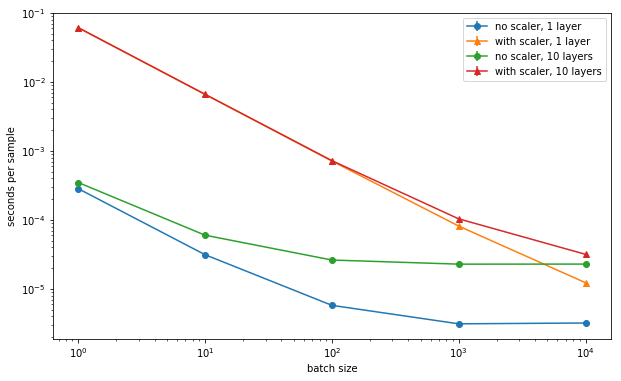

In [31]:
plt.figure(figsize=(10, 6))

t_raw        = np.empty(len(sizes), dtype=float)
t_raw_err    = np.empty(len(sizes), dtype=float)
t_scaler     = np.empty(len(sizes), dtype=float)
t_scaler_err = np.empty(len(sizes), dtype=float)

label_map = dict(kaon='1 layer',
                 kaon_full='10 layers')

for p in ['kaon', 'kaon_full']:
    for i, s in enumerate(sizes):
        t_raw       [i] = timings['raw'   ][p][s].mean()
        t_raw_err   [i] = timings['raw'   ][p][s].std() / len(timings['raw'   ][p][s])**0.5
        t_scaler    [i] = timings['scaler'][p][s].mean()
        t_scaler_err[i] = timings['scaler'][p][s].std() / len(timings['scaler'][p][s])**0.5

    plt.errorbar(sizes, 1./t_raw   , yerr=t_raw_err   / t_raw   **2, fmt='-o', label='no scaler, {}'  .format(label_map[p]))
    plt.errorbar(sizes, 1./t_scaler, yerr=t_scaler_err/ t_scaler**2, fmt='-^', label='with scaler, {}'.format(label_map[p]))

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('batch size')
plt.ylabel('seconds per sample');